# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [4]:
# Importando bibliotecas
import pandas as pd

# Cópia do dataset original
df_limpo = penguins.copy()

# Removendo colunas categóricas
df_limpo = df_limpo.drop(columns=["species", "island", "sex"])

# Removendo linhas com valores faltantes
df_limpo = df_limpo.dropna()

# Resetando o índice
df_limpo = df_limpo.reset_index(drop=True)

# Exibindo o resultado final
print("Dimensão final do dataset:", df_limpo.shape)
df_limpo.head()


Dimensão final do dataset: (342, 4)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

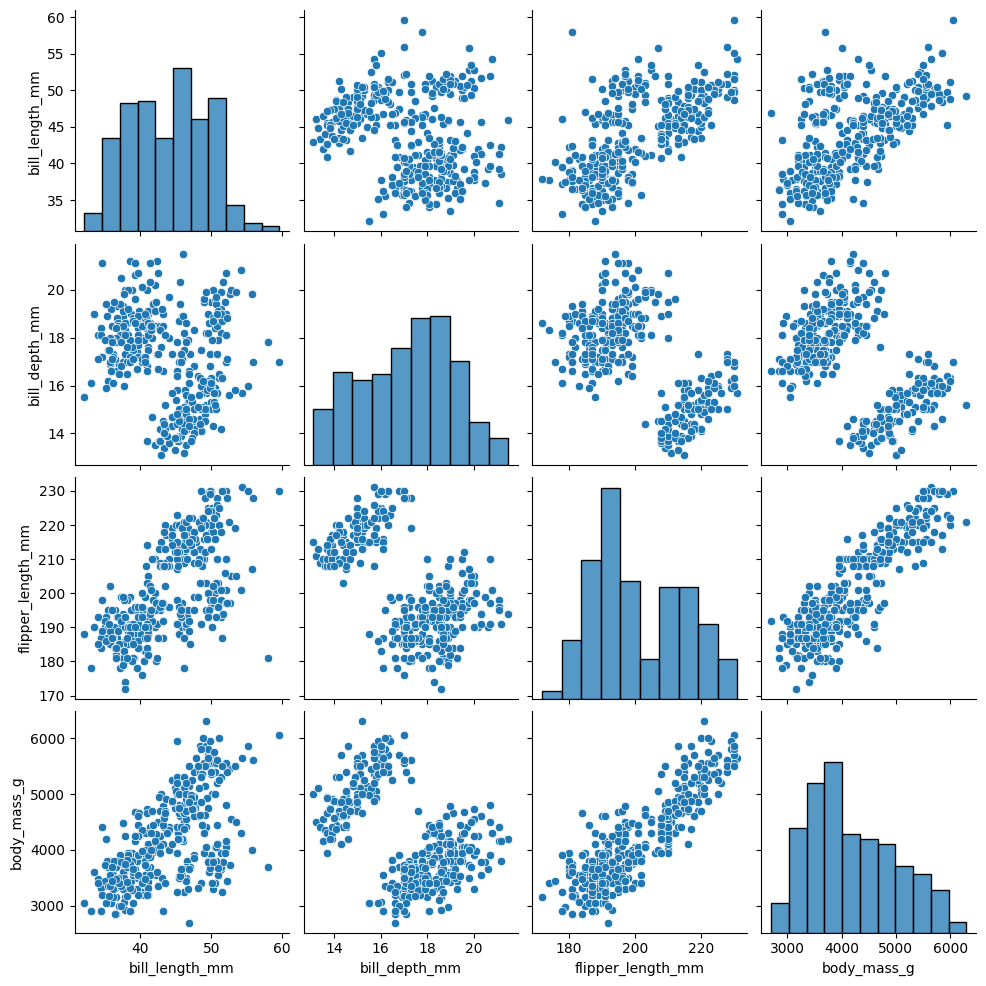

In [6]:
# Importando bibliotecas para visualização
import matplotlib.pyplot as plt

# Gerando o pairplot
sns.pairplot(df_limpo)
plt.show()


# 3 - Realize a padronização dos dados e visualize os dados.

In [9]:
# Selecionando apenas colunas numéricas
dados_numericos = df_limpo.select_dtypes(include=['float64', 'int64'])

# Criando o objeto de padronização
scaler = StandardScaler()

# Ajustando e transformando os dados
dados_padronizados = scaler.fit_transform(dados_numericos)

# Convertendo para DataFrame para visualização
df_padronizado = pd.DataFrame(dados_padronizados, columns=dados_numericos.columns)

# Visualizando o novo dataset padronizado
df_padronizado.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


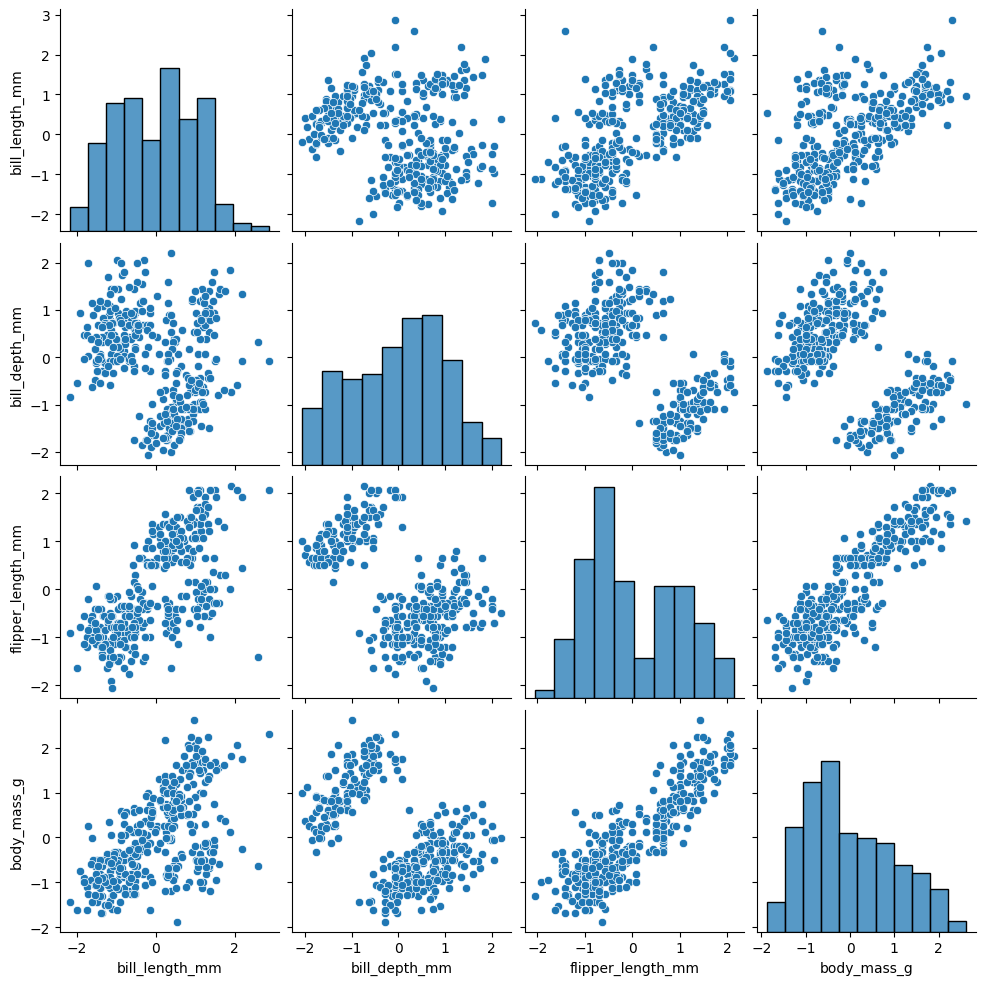

In [10]:
# Pairplot dos dados padronizados
sns.pairplot(df_padronizado)
plt.show()


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [11]:
# Aplicando o algoritmo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_padronizado)

# Obtendo os rótulos dos clusters
clusters = kmeans.labels_

# Adicionando os clusters ao dataframe original padronizado
df_padronizado['cluster'] = clusters

# Visualizando as primeiras linhas com os clusters
df_padronizado.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,-0.884499,0.785449,-1.418347,-0.564142,2
1,-0.811126,0.126188,-1.062250,-0.501703,2
2,-0.664380,0.430462,-0.421277,-1.188532,2
3,-1.324737,1.089724,-0.563715,-0.938776,2
4,-0.847812,1.748985,-0.777373,-0.689020,2


# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [14]:
# Extraindo centroides
centroides = kmeans.cluster_centers_

# Gráfico 1: bill_length_mm vs bill_depth_mm
fig1 = go.Figure()

# Pontos dos clusters
fig1.add_trace(
    go.Scatter(
        x=df_padronizado['bill_length_mm'],
        y=df_padronizado['bill_depth_mm'],
        mode='markers',
        marker=dict(color=df_padronizado['cluster'], colorscale='Viridis'),
        name='Pontos'
    )
)

# Centroides
fig1.add_trace(
    go.Scatter(
        x=centroides[:, df_padronizado.columns.get_loc('bill_length_mm')],
        y=centroides[:, df_padronizado.columns.get_loc('bill_depth_mm')],
        mode='markers',
        marker=dict(size=15, color='red', symbol='x'),
        name='Centroides'
    )
)

fig1.update_layout(
    title='Clusters e Centroides – bill_length_mm vs bill_depth_mm',
    xaxis_title='bill_length_mm (padronizado)',
    yaxis_title='bill_depth_mm (padronizado)'
)

fig1.show()


In [15]:
# Gráfico 2: flipper_length_mm vs body_mass_g
fig2 = go.Figure()

# Pontos dos clusters
fig2.add_trace(
    go.Scatter(
        x=df_padronizado['flipper_length_mm'],
        y=df_padronizado['body_mass_g'],
        mode='markers',
        marker=dict(color=df_padronizado['cluster'], colorscale='Viridis'),
        name='Pontos'
    )
)

# Centroides
fig2.add_trace(
    go.Scatter(
        x=centroides[:, df_padronizado.columns.get_loc('flipper_length_mm')],
        y=centroides[:, df_padronizado.columns.get_loc('body_mass_g')],
        mode='markers',
        marker=dict(size=15, color='red', symbol='x'),
        name='Centroides'
    )
)

fig2.update_layout(
    title='Clusters e Centroides – flipper_length_mm vs body_mass_g',
    xaxis_title='flipper_length_mm (padronizado)',
    yaxis_title='body_mass_g (padronizado)'
)

fig2.show()


# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

1. Segmentação de clientes

A clusterização ajuda empresas a entender melhor o comportamento dos clientes.
Ela agrupa pessoas com hábitos parecidos — como quem compra com frequência, quem só pega promoção ou quem prefere certos produtos.
Isso permite criar campanhas mais eficientes e personalizadas.

2. Detecção de anomalias

Algoritmos de clusterização identificam quando algo foge muito do padrão.
Isso é útil para encontrar transações suspeitas, erros em máquinas, acessos estranhos ou qualquer comportamento atípico.
É muito usado em bancos, segurança e indústria.

3. Agrupamento de imagens

Na visão computacional, a clusterização organiza imagens parecidas mesmo sem rótulos.
Ela separa automaticamente fotos de animais, objetos ou ambientes com base em padrões visuais.
Isso facilita buscas, organização e reconhecimento de conteúdo.